In [145]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
!pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
df=pd.read_csv('/content/FuelConsumptionCo2.csv')
df

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,SUV_SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,SUV_SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,SUV_SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,SUV_SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [147]:
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
df.shape

(952, 12)

In [148]:
df['Brands'].value_counts()

FORD             90
CHEVROLET        79
MERCEDES-BENZ    55
TOYOTA           48
BMW              47
VOLKSWAGEN       42
GMC              42
AUDI             41
DODGE            37
PORSCHE          34
NISSAN           33
KIA              33
CADILLAC         30
MAZDA            25
JEEP             24
HYUNDAI          24
SUBARU           23
INFINITI         21
HONDA            21
LEXUS            21
MINI             18
CHRYSLER         17
MITSUBISHI       16
JAGUAR           15
BUICK            15
LAND ROVER       13
RAM              13
ACURA            12
LINCOLN          11
VOLVO            10
SCION             9
BENTLEY           7
ROLLS-ROYCE       6
FIAT              6
MASERATI          5
ASTON MARTIN      4
LAMBORGHINI       3
SMART             1
SRT               1
Name: Brands, dtype: int64

In [149]:
df[df['Brands']=='GMC']['FUELTYPE'].value_counts()

X    21
E    17
Z     4
Name: FUELTYPE, dtype: int64

In [150]:
df[df['CO2EMISSIONS']>450]

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
349,2014,FORD,VAN_PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488


In [151]:
df[df['ENGINESIZE']>7]

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
940,2014,SRT,TWO-SEATER,8.4,10,M6,Z,20.0,13.0,16.9,17,389


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 952 non-null    int64  
 1   Brands                    952 non-null    object 
 2   VEHICLECLASS              952 non-null    object 
 3   ENGINESIZE                952 non-null    float64
 4   CYLINDERS                 952 non-null    int64  
 5   TRANSMISSION              952 non-null    object 
 6   FUELTYPE                  952 non-null    object 
 7   FUELCONSUMPTION_CITY      952 non-null    float64
 8   FUELCONSUMPTION_HWY       952 non-null    float64
 9   FUELCONSUMPTION_COMB      952 non-null    float64
 10  FUELCONSUMPTION_COMB_MPG  952 non-null    int64  
 11  CO2EMISSIONS              952 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 96.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


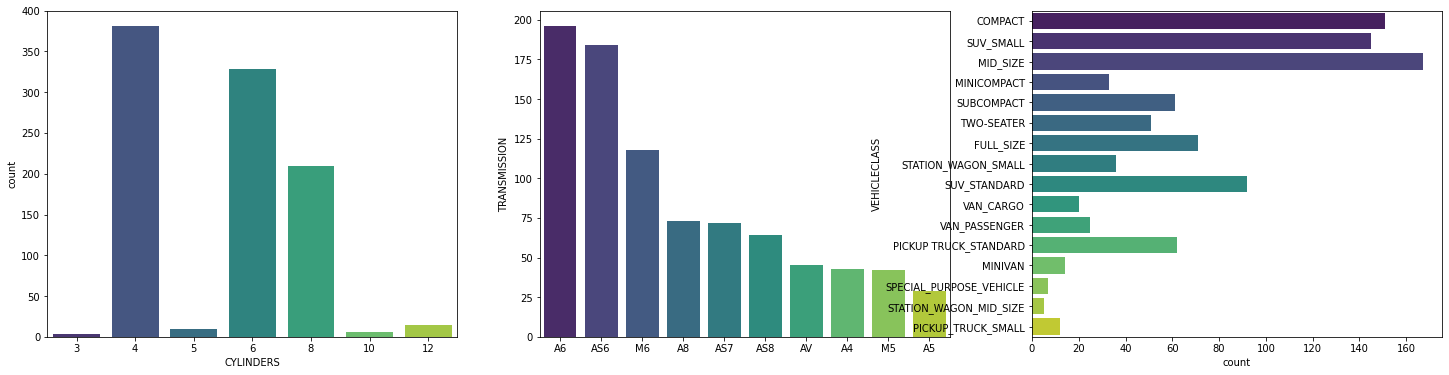

In [153]:
fig,axes=plt.subplots(1,3,figsize=(25,6))
sns.countplot(df['CYLINDERS'],palette='viridis',ax=axes[0])
sns.barplot(df['TRANSMISSION'].value_counts().head(10).index,df['TRANSMISSION'].value_counts().head(10),palette='viridis',ax=axes[1])
sns.countplot(y=df['VEHICLECLASS'],palette='viridis',ax=axes[2])

[Text(0.5, 1.0, '10 Cylinder cars')]

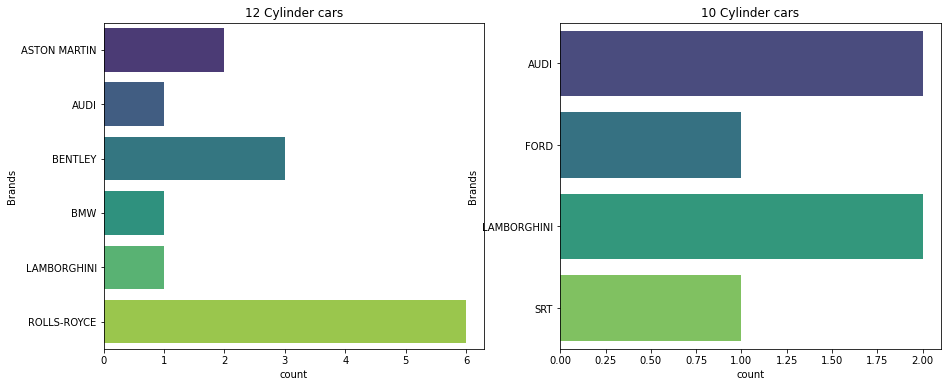

In [186]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.countplot(y=df[df['CYLINDERS']==12]['Brands'],data=df,palette='viridis',ax=axes[0]).set(title='12 Cylinder cars')
sns.countplot(y=df[df['CYLINDERS']==10]['Brands'],data=df,palette='viridis',ax=axes[1]).set(title='10 Cylinder cars')
##(High cylinders=high fuel consumption=high CO2 emission)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seab

[Text(0.5, 1.0, 'fuel_Hwy_Outliers')]

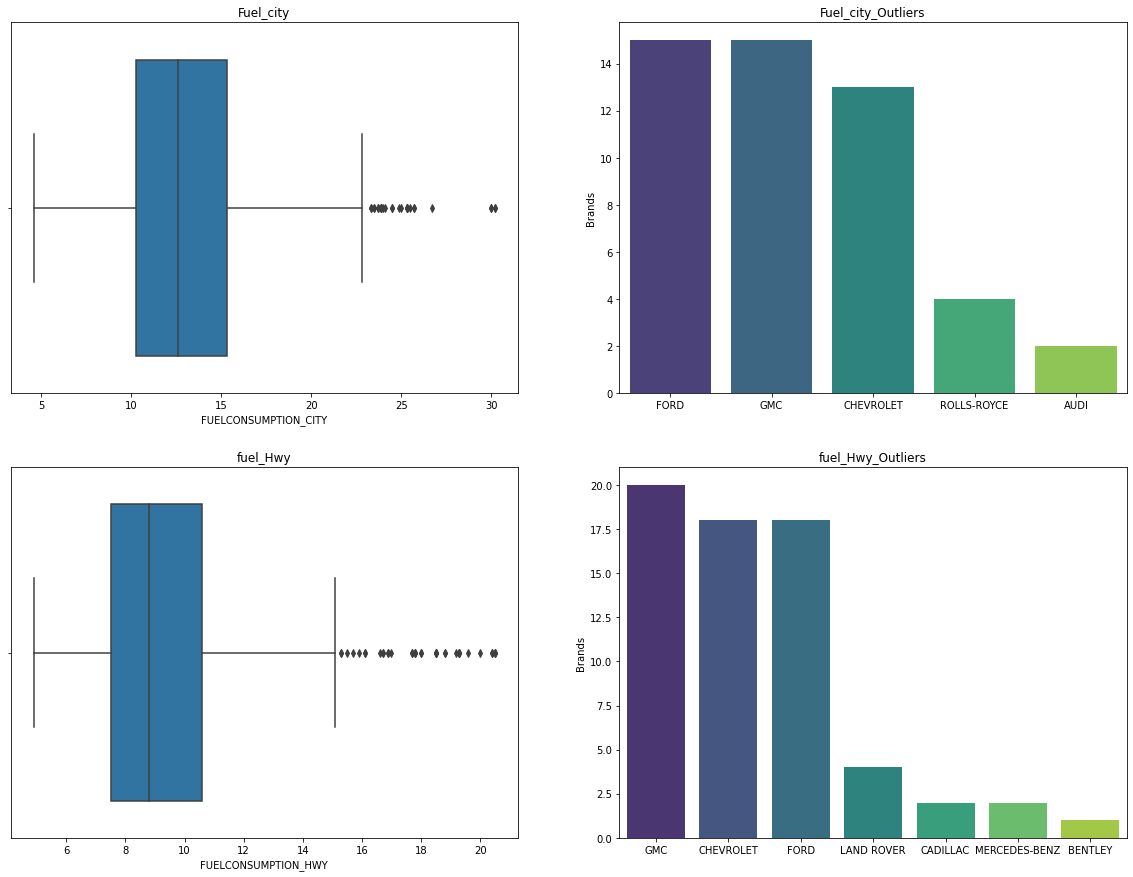

In [154]:
fig,axes=plt.subplots(2,2,figsize=(20,15))
sns.boxplot(df['FUELCONSUMPTION_CITY'],ax=axes[0,0]).set(title='Fuel_city')
sns.barplot(df[df['FUELCONSUMPTION_CITY']>20]['Brands'].value_counts().head(5).index,df[df['FUELCONSUMPTION_CITY']>20]['Brands'].value_counts().head(5),palette='viridis',ax=axes[0,1]).set(title='Fuel_city_Outliers')
sns.boxplot(df['FUELCONSUMPTION_HWY'],ax=axes[1,0]).set(title='fuel_Hwy')
sns.barplot(df[df['FUELCONSUMPTION_HWY']>14]['Brands'].value_counts().head(7).index,df[df['FUELCONSUMPTION_HWY']>14]['Brands'].value_counts().head(7),palette='viridis',ax=axes[1,1]).set(title='fuel_Hwy_Outliers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seab

[Text(0.5, 1.0, 'Fuel_MPG_Outliers')]

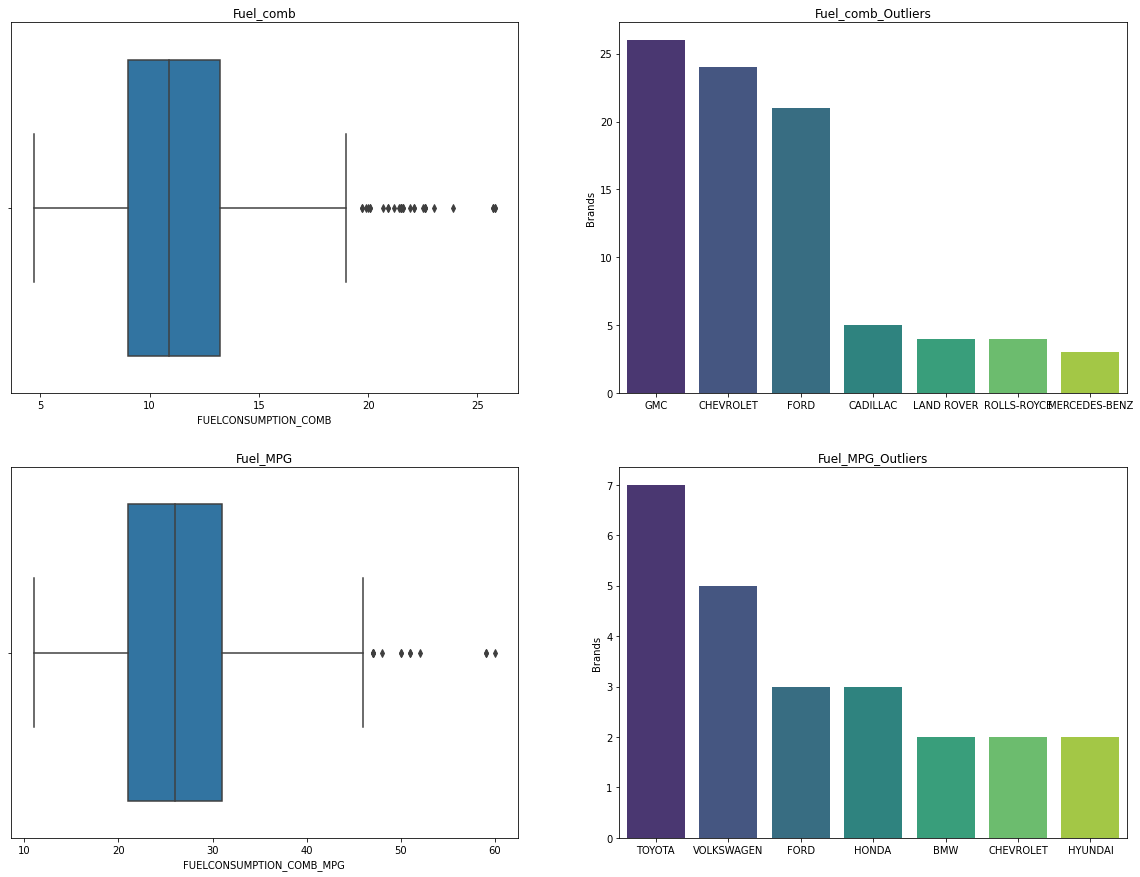

In [155]:
fig,axes=plt.subplots(2,2,figsize=(20,15))
sns.boxplot(df['FUELCONSUMPTION_COMB'],ax=axes[0,0]).set(title='Fuel_comb')
sns.barplot(df[df['FUELCONSUMPTION_COMB']>16]['Brands'].value_counts().head(7).index,df[df['FUELCONSUMPTION_COMB']>16]['Brands'].value_counts().head(7),palette='viridis',ax=axes[0,1]).set(title='Fuel_comb_Outliers')
sns.boxplot(df['FUELCONSUMPTION_COMB_MPG'],ax=axes[1,0]).set(title='Fuel_MPG')
sns.barplot(df[df['FUELCONSUMPTION_COMB_MPG']>40]['Brands'].value_counts().head(7).index,df[df['FUELCONSUMPTION_COMB_MPG']>40]['Brands'].value_counts().head(7),palette='viridis',ax=axes[1,1]).set(title='Fuel_MPG_Outliers')

[Text(0.5, 1.0, 'Fuel type D')]

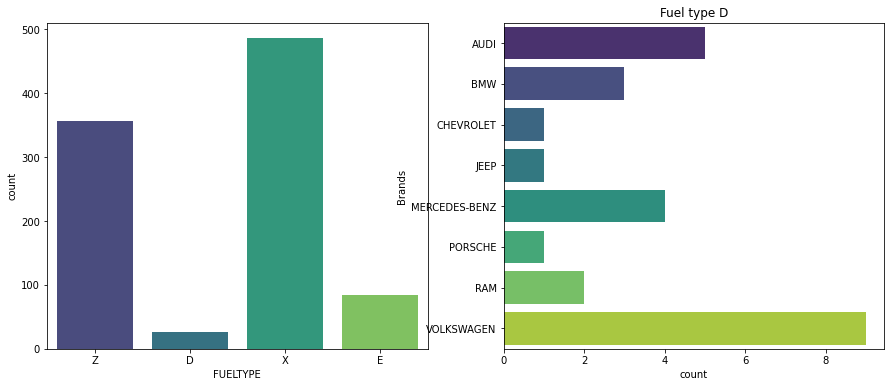

In [156]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['FUELTYPE'],data=df,ax=axes[0],palette='viridis')
sns.countplot(y=df[df['FUELTYPE']=='D']['Brands'],data=df,ax=axes[1],palette='viridis').set(title='Fuel type D')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'CO2 Emission')]

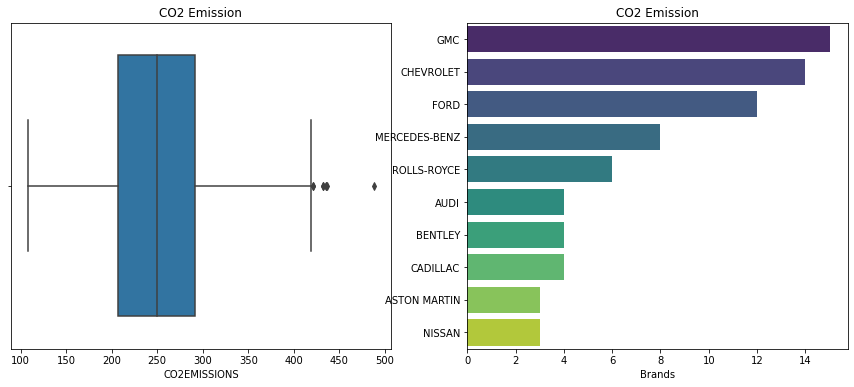

In [157]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['CO2EMISSIONS'],ax=axes[0]).set(title='CO2 Emission')
sns.barplot(df[df['CO2EMISSIONS']>350]['Brands'].value_counts().head(10),df[df['CO2EMISSIONS']>350]['Brands'].value_counts().head(10).index,palette='viridis',ax=axes[1]).set(title='CO2 Emission')


[Text(0.5, 1.0, 'chevy')]

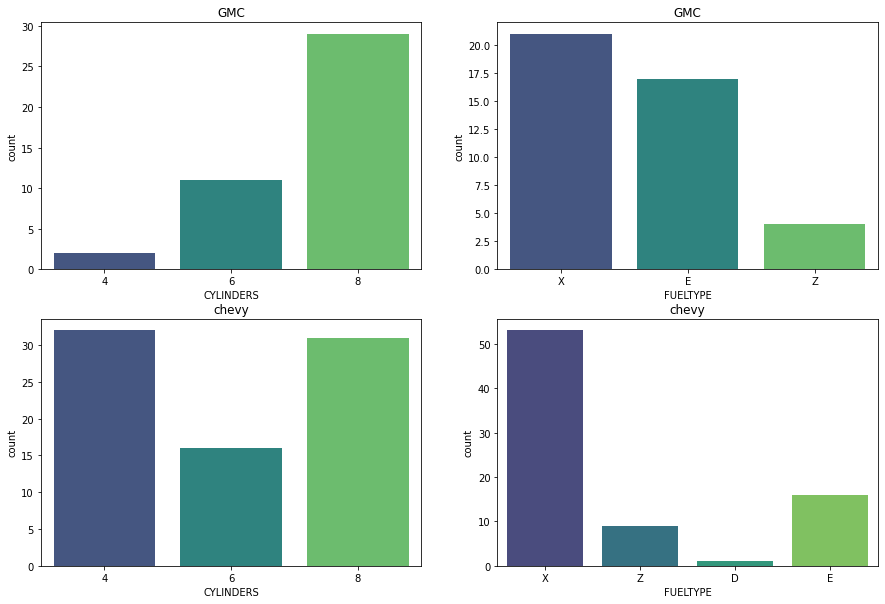

In [158]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x=df[df['Brands']=='GMC']['CYLINDERS'],data=df,ax=axes[0,0],palette='viridis').set(title='GMC')
sns.countplot(x=df[df['Brands']=='GMC']['FUELTYPE'],data=df,ax=axes[0,1],palette='viridis').set(title='GMC')
sns.countplot(x=df[df['Brands']=='CHEVROLET']['CYLINDERS'],data=df,ax=axes[1,0],palette='viridis').set(title='chevy')
sns.countplot(x=df[df['Brands']=='CHEVROLET']['FUELTYPE'],data=df,ax=axes[1,1],palette='viridis').set(title='chevy')

[Text(0.5, 1.0, 'MERCEDES')]

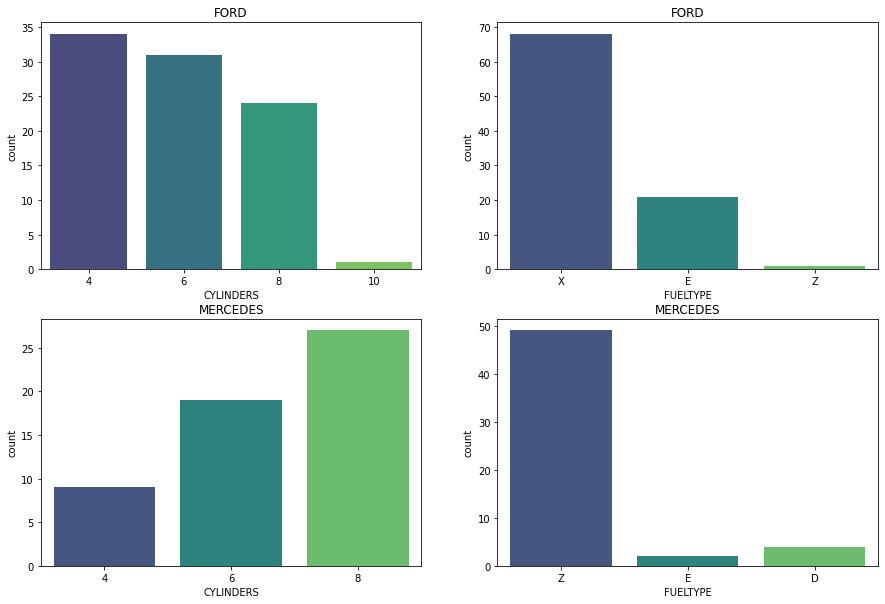

In [159]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x=df[df['Brands']=='FORD']['CYLINDERS'],data=df,ax=axes[0,0],palette='viridis').set(title='FORD')
sns.countplot(x=df[df['Brands']=='FORD']['FUELTYPE'],data=df,ax=axes[0,1],palette='viridis').set(title='FORD')
sns.countplot(x=df[df['Brands']=='MERCEDES-BENZ']['CYLINDERS'],data=df,ax=axes[1,0],palette='viridis').set(title='MERCEDES')
sns.countplot(x=df[df['Brands']=='MERCEDES-BENZ']['FUELTYPE'],data=df,ax=axes[1,1],palette='viridis').set(title='MERCEDES')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

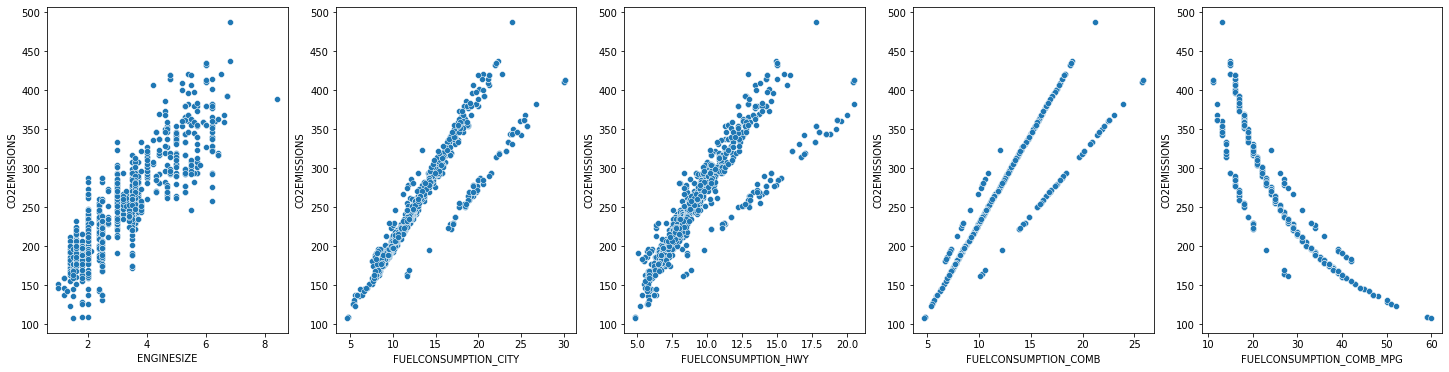

In [160]:
fig,axes=plt.subplots(1,5,figsize=(25,6))
sns.scatterplot(df['ENGINESIZE'],df['CO2EMISSIONS'],palette='viridis',ax=axes[0],data=df)
sns.scatterplot(df['FUELCONSUMPTION_CITY'],df['CO2EMISSIONS'],palette='viridis',ax=axes[1],data=df)
sns.scatterplot(df['FUELCONSUMPTION_HWY'],df['CO2EMISSIONS'],palette='viridis',ax=axes[2],data=df)
sns.scatterplot(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'],palette='viridis',ax=axes[3],data=df)
sns.scatterplot(df['FUELCONSUMPTION_COMB_MPG'],df['CO2EMISSIONS'],palette='viridis',ax=axes[4],data=df)

In [161]:
df['new_fuel']=df['FUELTYPE'].replace({'X':1,'Z':2,'E':3,'D':4})

df['new_transmission']=df['TRANSMISSION'].replace({'A6':1,'AS6':2,'M6':3,'A8':4,'AS7':5,'AS8':6,'AV':7,'A4':8,'M5':9,'A5':10,'AM7':11,'AV6':12,'AS5':13,'A7':14,'M7':15,'A9':16,'AM6':17,'AV7':18,'AV8':19,'AS9':20,'AS4':21,'AM5':22})

df['new_vehicle_class']=df['VEHICLECLASS'].replace({'MID_SIZE':1,'COMPACT':2,'SUV_SMALL':3,'SUV_STANDARD':4,'FULL_SIZE':5,'TWO-SEATER':6,'SUBCOMPACT':7,'PICKUP TRUCK_STANDARD':8,'MINICOMPACT':9,'STATION_WAGON_SMALL':10,'VAN_PASSENGER':11,'VAN_CARGO':12,'MINIVAN':13,'PICKUP_TRUCK_SMALL':14,'SPECIAL_PURPOSE_VEHICLE':15,'STATION_WAGON_MID_SIZE':16})

df['new_brand']=df['Brands'].replace({'FORD':1,'CHEVROLET':2,'MERCEDES-BENZ':3,'TOYOTA':4,'BMW':5,'VOLKSWAGEN':6,'GMC':7,'AUDI':8,'DODGE':9,'PORSCHE':10,'NISSAN':11,'KIA':12,'CADILLAC':13,'MAZDA':14,'JEEP':15,'HYUNDAI':16,'SUBARU':17,'INFINITI':18,'HONDA':19,'LEXUS':20,'MINI':21,'CHRYSLER':23,'MITSUBISHI':24,'JAGUAR':25,'BUICK':26,'LAND ROVER':27,'RAM':28,'ACURA':29,'LINCOLN':30,'VOLVO':31,'SCION':32,'BENTLEY':33,'ROLLS-ROYCE':34,'FIAT':35,'MASERATI':36,'ASTON MARTIN':37,'LAMBORGHINI':38,'SMART':39,'SRT':40})


In [162]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,new_fuel,new_transmission,new_vehicle_class,new_brand
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934377,0.825390,0.772854,0.812729,-0.798210,0.869835,0.232170,-0.016273,0.261975,-0.034326
CYLINDERS,NaN,0.934377,1.000000,0.788633,0.719775,0.769732,-0.759572,0.843533,0.272269,0.010749,0.233792,0.034899
FUELCONSUMPTION_CITY,NaN,0.825390,0.788633,1.000000,0.965839,0.995497,-0.932580,0.897429,0.371693,-0.083555,0.348972,-0.046056
FUELCONSUMPTION_HWY,NaN,0.772854,0.719775,0.965839,1.000000,0.985961,-0.888966,0.860853,0.346845,-0.040990,0.405799,-0.083941
FUELCONSUMPTION_COMB,NaN,0.812729,0.769732,0.995497,0.985961,1.000000,-0.924140,0.891306,0.365808,-0.068889,0.372491,-0.060084
FUELCONSUMPTION_COMB_MPG,NaN,-0.798210,-0.759572,-0.932580,-0.888966,-0.924140,1.000000,-0.903649,-0.289266,0.093343,-0.329099,0.032772
CO2EMISSIONS,NaN,0.869835,0.843533,0.897429,0.860853,0.891306,-0.903649,1.000000,0.191109,-0.039297,0.353862,-0.019084
new_fuel,NaN,0.232170,0.272269,0.371693,0.346845,0.365808,-0.289266,0.191109,1.000000,-0.011234,0.051833,-0.030722
new_transmission,NaN,-0.016273,0.010749,-0.083555,-0.040990,-0.068889,0.093343,-0.039297,-0.011234,1.000000,0.065766,0.121337


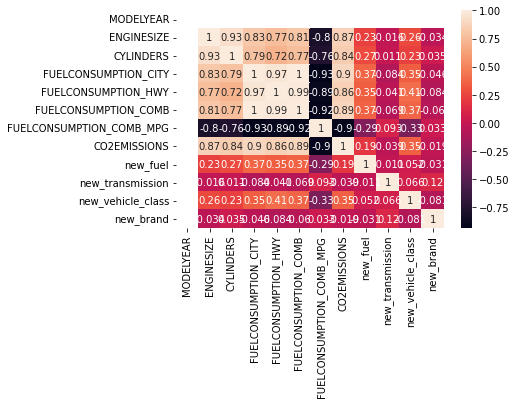

In [163]:
sns.heatmap(df.corr(),annot=True)

In [164]:
x=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','new_fuel','new_vehicle_class']].values
y=df['CO2EMISSIONS'].values

In [165]:
from sklearn.preprocessing import PolynomialFeatures
##
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
##
x_train, x_test, y_train, y_test  = train_test_split(x_poly,y, test_size=0.33, random_state = 1)
##
lin_reg=linear_model.LinearRegression()
lin_reg.fit(x_train,y_train)
##
y_pred=lin_reg.predict(x_test)
avg_loss, avg_bais, avg_variance = bias_variance_decomp(lin_reg,x_train,y_train,x_test,y_test, loss = 'mse', random_seed=32, num_rounds=200)

print('Average Loss = ', round(avg_loss,4))
print('Average bais = ', round(avg_bais,4))
print('Average variance = ', round(avg_variance,4))
##
from sklearn import metrics
##
print('MSE = ',round(np.sqrt(metrics.mean_squared_error(y_pred,y_test)),4))

Average Loss =  5.5826
Average bais =  2.4751
Average variance =  3.1074
MSE =  1.4874


In [206]:
##(High cylinders=high fuel consumption=high CO2 emission)
#Fuel X has the highest CO2 percentage
#brand GMC has the highest CO2 emission
df[df['FUELTYPE']=='X']['CO2EMISSIONS'].max()
df[df['FUELTYPE']=='Z']['CO2EMISSIONS'].max()
df[df['FUELTYPE']=='E']['CO2EMISSIONS'].max()
df[df['FUELTYPE']=='D']['CO2EMISSIONS'].max()

488